In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In [2]:
#Cargamos nuestro dataset
df = pd.read_csv('C:/Users/fksob/OneDrive/CoderHouse - Data Science/LifeE.Coder.01/Source/Lifeexpectancydata.csv')


In [3]:
#Desplegamos info del mismo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
#Realizazamos transformaciones para optimizar el trabajo con el dataset
rename_columns = {
    'Country': 'País',
    'Year': 'Año',
    'Status': 'Estado de desarrollo',
    'Life expectancy ': 'Esperanza de vida',
    'Adult Mortality': 'Mortalidad adulta',
    'infant deaths': 'Muertes infantiles',
    'Alcohol': 'Alcohol',
    'percentage expenditure': 'Gasto porcentual',
    'Hepatitis B': 'Hepatitis B',
    'Measles ': 'Sarampión',
    ' BMI ': 'IMC',
    'under-five deaths ': 'Muertes menores de cinco años',
    'Polio': 'Polio',
    'Total expenditure': 'Gasto total',
    'Diphtheria ': 'Difteria',
    ' HIV/AIDS': 'VIH/SIDA',
    'GDP': 'PIBPC',
    'Population': 'Población',
    ' thinness  1-19 years': 'Delgadez 1-19 años',
    ' thinness 5-9 years': 'Delgadez 5-9 años',
    'Income composition of resources': 'Indice de desarrollo humano',
    'Schooling': 'Escolaridad'
}

In [5]:
#Realizamos el cambio de nombre de cada una de nuestras columnas para trabajar con mayor comodidad.
df01 = df
dfrenamed = df01.rename(columns=rename_columns)
dfrenamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   País                           2938 non-null   object 
 1   Año                            2938 non-null   int64  
 2   Estado de desarrollo           2938 non-null   object 
 3   Esperanza de vida              2928 non-null   float64
 4   Mortalidad adulta              2928 non-null   float64
 5   Muertes infantiles             2938 non-null   int64  
 6   Alcohol                        2744 non-null   float64
 7   Gasto porcentual               2938 non-null   float64
 8   Hepatitis B                    2385 non-null   float64
 9   Sarampión                      2938 non-null   int64  
 10  IMC                            2904 non-null   float64
 11  Muertes menores de cinco años  2938 non-null   int64  
 12  Polio                          2919 non-null   f

In [6]:
#Buscamos valores nulos
dfrenamed.isnull().sum()

País                               0
Año                                0
Estado de desarrollo               0
Esperanza de vida                 10
Mortalidad adulta                 10
Muertes infantiles                 0
Alcohol                          194
Gasto porcentual                   0
Hepatitis B                      553
Sarampión                          0
IMC                               34
Muertes menores de cinco años      0
Polio                             19
Gasto total                      226
Difteria                          19
VIH/SIDA                           0
PIBPC                            448
Población                        652
Delgadez 1-19 años                34
Delgadez 5-9 años                 34
Indice de desarrollo humano      167
Escolaridad                      163
dtype: int64

In [7]:
#Transformamos los nulos
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None)

dfrenamed['Esperanza de vida'] = imputer.fit_transform(dfrenamed[['Esperanza de vida']])
dfrenamed['Mortalidad adulta'] = imputer.fit_transform(dfrenamed[['Mortalidad adulta']])
dfrenamed['Alcohol'] = imputer.fit_transform(dfrenamed[['Alcohol']])
dfrenamed['Hepatitis B'] = imputer.fit_transform(dfrenamed[['Hepatitis B']])
dfrenamed['IMC'] = imputer.fit_transform(dfrenamed[['IMC']])
dfrenamed['Polio'] = imputer.fit_transform(dfrenamed[['Polio']])
dfrenamed['Gasto total'] = imputer.fit_transform(dfrenamed[['Gasto total']])
dfrenamed['Difteria'] = imputer.fit_transform(dfrenamed[['Difteria']])
dfrenamed['PIBPC'] = imputer.fit_transform(dfrenamed[['PIBPC']])
dfrenamed['Población'] = imputer.fit_transform(dfrenamed[['Población']])
dfrenamed['Delgadez 1-19 años'] = imputer.fit_transform(dfrenamed[['Delgadez 1-19 años']])
dfrenamed['Delgadez 5-9 años'] = imputer.fit_transform(dfrenamed[['Delgadez 5-9 años']])
dfrenamed['Indice de desarrollo humano'] = imputer.fit_transform(dfrenamed[['Indice de desarrollo humano']])
dfrenamed['Escolaridad'] = imputer.fit_transform(dfrenamed[['Escolaridad']])

dfrenamed.isnull().sum()

País                             0
Año                              0
Estado de desarrollo             0
Esperanza de vida                0
Mortalidad adulta                0
Muertes infantiles               0
Alcohol                          0
Gasto porcentual                 0
Hepatitis B                      0
Sarampión                        0
IMC                              0
Muertes menores de cinco años    0
Polio                            0
Gasto total                      0
Difteria                         0
VIH/SIDA                         0
PIBPC                            0
Población                        0
Delgadez 1-19 años               0
Delgadez 5-9 años                0
Indice de desarrollo humano      0
Escolaridad                      0
dtype: int64

Regresion Lineal Lasso

Utilizaremos este metodo para definir entre las Variables previamente utilizadas en nuestro EDA, para definir cual se ajusta mas a nuestro modelo y trabajar con ella.

In [8]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

x = dfrenamed.drop(columns=['País','Estado de desarrollo','Esperanza de vida'])
y = dfrenamed['Esperanza de vida']

# Escalamos las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Aplicamos Lasso  
lasso = Lasso(alpha=0.1)
lasso.fit(X_scaled, y)

# Observamos los Coeficientes de Lasso
coef = pd.Series(lasso.coef_, index=x.columns)
print(coef[coef != 0])

Mortalidad adulta               -2.562924
Alcohol                          0.279425
Gasto porcentual                 0.270664
Hepatitis B                     -0.187944
Sarampión                       -0.236750
IMC                              0.873335
Muertes menores de cinco años   -0.114882
Polio                            0.686856
Gasto total                      0.164756
Difteria                         1.000274
VIH/SIDA                        -2.378745
PIBPC                            0.376686
Población                        0.003230
Delgadez 1-19 años              -0.303052
Indice de desarrollo humano      1.368328
Escolaridad                      2.276493
dtype: float64


Las dos variables con mayor influencia positiva estan relacionadas con factores que promueven la salud y el bienestar, como escolaridad y índice de desarrollo humano o niveles inmunologicos.

- *Escolaridad: Número de años de escolaridad*
- *Índice de Desarrollo Humano en términos de composición del ingreso de los recursos*
- *Difteria: cobertura de inmunización contra la difteria, el tétanos, el toxoide y la tos ferina (DTP3) en niños de 1 año*

Las dos variables con mayor influencia negativa estan asociadas a condiciones adversas para la salud, como mortalidad adulta o muertes relacionadas con VIH/SIDA.

- *VIH/SIDA: Muertes por cada 1 000 nacidos vivos VIH/SIDA*
- *Mortalidad Adulta: Tasas de mortalidad de adultos de ambos sexos (probabilidad de morir entre 15 y 60 años por 1000 habitantes)*

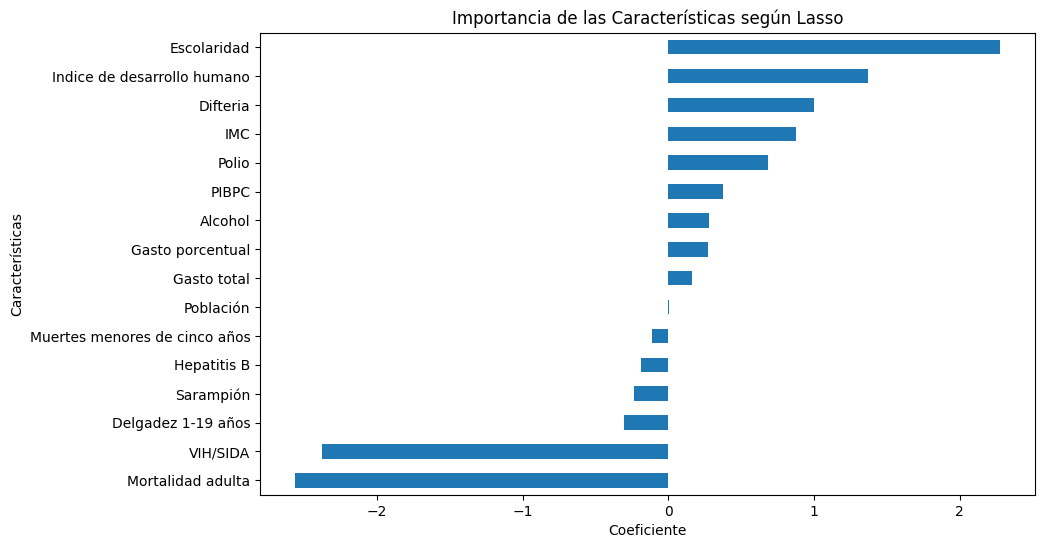

In [9]:
import matplotlib.pyplot as plt

# Filtramos y ordenamos coeficientes
coef = coef[coef != 0].sort_values()

# Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
coef.plot(kind='barh')
plt.title('Importancia de las Características según Lasso')
plt.xlabel('Coeficiente')
plt.ylabel('Características')
plt.show()

**_Grafico de variables mas influyentes_**

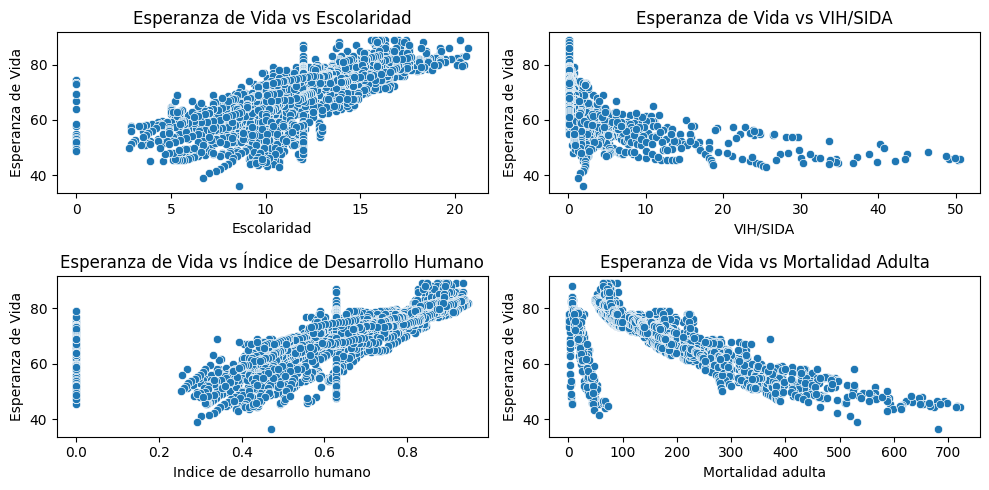

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir las variables a graficar
variables = ['Escolaridad', 'VIH/SIDA', 'Indice de desarrollo humano', 'Mortalidad adulta']
titles = [
    'Esperanza de Vida vs Escolaridad',
    'Esperanza de Vida vs VIH/SIDA',
    'Esperanza de Vida vs Índice de Desarrollo Humano',
    'Esperanza de Vida vs Mortalidad Adulta'
]

# Crear una figura con 4 subplots (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Iterar sobre las variables y los subplots
for i, var in enumerate(variables):
    row, col = divmod(i, 2)  # Calcular la posición de fila y columna
    sns.scatterplot(data=dfrenamed, x=var, y='Esperanza de vida', ax=axes[row, col])
    axes[row, col].set_title(titles[i])
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Esperanza de Vida')

# Ajustar el diseño para que no se solapen
plt.tight_layout()
plt.show()

- Las variables positivas, resultan ser caracteristicas con mayor impacto positivo en la _Esperanza de vida_, esto indica que niveles mas altos de educacion y desarrollo estan relacionados con una mayor esperanzaz de vida, esto podria ser porque en un mayor nivel de educacion y desarrollo permite un mejor acceso a los servicios de salud, mayor conciencia sobre la prevencion de enfermedades y mayor calidad de vida en general. 

- Las viariables negativas como _Mortalidad adulta_ y _VIH/SIDA_ que en este contexto son las mas influyentes, podrian acercarnos a la conclusion de que estas altas tasas de mortalidad se deben a enfermedades graves o cronicas que reducen significativamente la _Esperanza de vida_, estos factores estan relacionados con sistemas de salud deficientes o contextos de salud publica desfavorables.

 **_Seleccion del modelo_**

In [30]:
from sklearn.model_selection import train_test_split

# Definimos X e y basándonos en las variables seleccionadas por Lasso
X = dfrenamed[['Escolaridad', 'Indice de desarrollo humano', 'Difteria', 'IMC', 'Polio', 
               'Gasto porcentual', 'PIBPC', 'Mortalidad adulta', 'VIH/SIDA']]
y = dfrenamed['Esperanza de vida']

# Dividimos en conjunto de entrenamiento y prueba (80% entrenamiento y 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definimos los modelos
modelos = {
    "Regresión Lineal": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Entrenamos y evaluamos cada modelo
resultados = {}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)  
    y_pred = modelo.predict(X_test)
    
    # Evaluación
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Almacenar resultados
    resultados[nombre] = {"MAE": mae, "MSE": mse, "R2": r2}

# Mostramos resultados
for nombre, metrica in resultados.items():
    print(f"\n{nombre}")
    print("MAE:", metrica["MAE"])
    print("MSE:", metrica["MSE"])
    print("R2:", metrica["R2"])


Regresión Lineal
MAE: 2.9733059943185967
MSE: 16.621663859980764
R2: 0.8081420819172268

Random Forest
MAE: 1.1736906202371644
MSE: 3.0018279565886083
R2: 0.9653509740634099

Gradient Boosting
MAE: 1.6487061506889873
MSE: 5.0626734119587775
R2: 0.9415633724196523


**_Random Forest nos ofrece mejores valores de ajuste._**


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definimos el modelo de Random Forest
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenamos el modelo con los datos de entrenamiento
random_forest.fit(X_train, y_train)

# Se hacen predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test)

# Se evalua el rendimiento del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas de rendimiento
print("Random Forest Regressor")
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)

Random Forest Regressor
MAE: 1.1736906202371644
MSE: 3.0018279565886083
R2: 0.9653509740634099


**_Realizamos el ajuste de hiperparametros de Random Forest utilizando GridSearchCV_**

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros que queremos probar en el grid
param_grid = {
    'n_estimators': [100, 200, 300],          # Número de árboles
    'max_depth': [None, 10, 20, 30],          # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],          # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],            # Mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2']  # Número máximo de características para dividir
}

# Inicializar el modelo
rf = RandomForestRegressor(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)

# Entrenar GridSearchCV
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y el puntaje
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntaje R2:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores parámetros: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mejor puntaje R2: 0.9505531007458516


**_El R² de 0.950 es excelente y significa que el modelo puede explicar el 95% de la variabilidad en la esperanza de vida._**


In [14]:
# Mejor modelo ajustado
mejor_rf = grid_search.best_estimator_

# Predicciones en el conjunto de prueba
y_pred = mejor_rf.predict(X_test)

# Evaluación
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Ajustado con Hiperparámetros Óptimos")
print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)

Random Forest Ajustado con Hiperparámetros Óptimos
MAE: 1.2076315341437132
MSE: 3.1172765224907297
R2: 0.9640183925790164


In [15]:
from sklearn.model_selection import cross_val_score

# Validación cruzada con los mejores hiperparámetros
scores = cross_val_score(mejor_rf, X, y, cv=5, scoring='r2')
print("Validación cruzada adicional (R2):", scores)
print("Promedio R2:", scores.mean())

Validación cruzada adicional (R2): [0.93113047 0.89269854 0.91738367 0.90579278 0.91659254]
Promedio R2: 0.9127196017789403


In [16]:
y_pred_test = mejor_rf.predict(X_test)

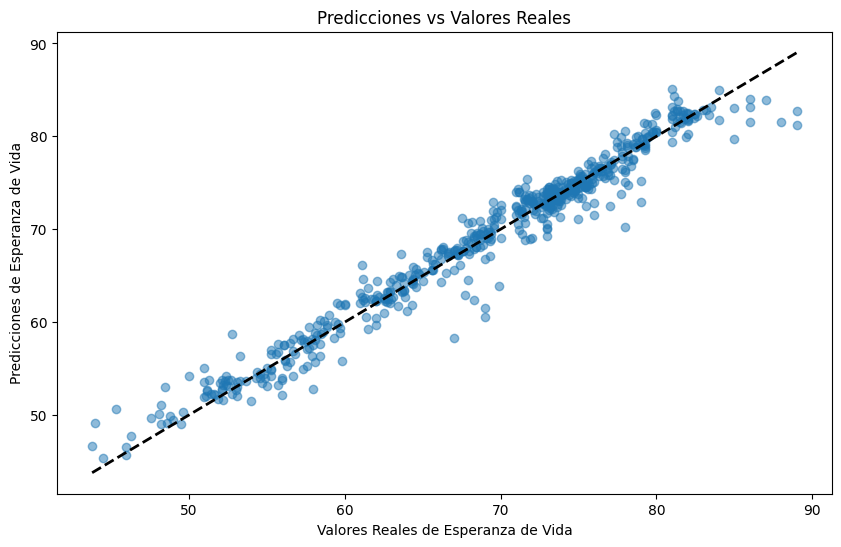

In [17]:
import matplotlib.pyplot as plt

# Graficar predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales de Esperanza de Vida')
plt.ylabel('Predicciones de Esperanza de Vida')
plt.title('Predicciones vs Valores Reales')
plt.show()

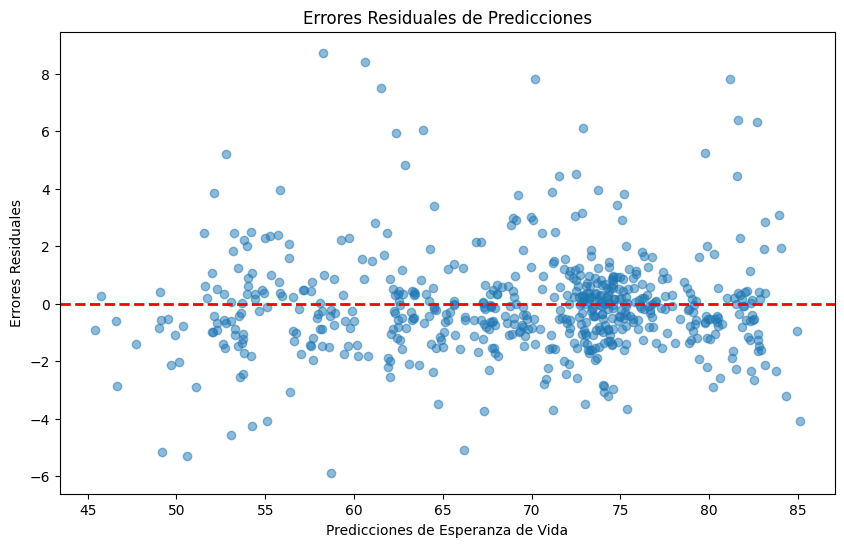

In [18]:
# Calcular los errores residuales
residuals = y_test - y_pred_test

# Graficar los errores residuales
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicciones de Esperanza de Vida')
plt.ylabel('Errores Residuales')
plt.title('Errores Residuales de Predicciones')
plt.show()

- _Los resultados del modelo de Random Forest indican que la esperanza de vida está fuertemente influenciada por el nivel educativo y el índice de desarrollo humano en cada país, lo cual sugiere que las políticas orientadas a mejorar el acceso a la educación y el desarrollo social pueden tener un impacto positivo en la salud de la población. Sin embargo, la alta mortalidad adulta y las muertes asociadas a enfermedades como el VIH/SIDA tienen una influencia negativa importante, lo que resalta la necesidad de intervenciones en salud pública para reducir la incidencia de enfermedades críticas y mejorar la calidad de vida en estas poblaciones._

_Modelo aplicado a LATAM_

In [40]:
latam = [
    'Argentina', 'Bolivia', 'Brasil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 'República Dominicana',
    'Ecuador', 'El Salvador', 'Guatemala', 'Honduras', 'México', 'Nicaragua', 'Panamá', 'Paraguay',
    'Perú', 'Uruguay', 'Venezuela'
]

dfrenamed['Latam'] = dfrenamed['País'].isin(latam)

dfrenamed[['País','Latam']].head()

,País,Latam
0,Afghanistan,False
1,Afghanistan,False
2,Afghanistan,False
3,Afghanistan,False
4,Afghanistan,False


In [41]:
df_latam = dfrenamed[dfrenamed['Latam'] == True]

X_latam = df_latam[['Escolaridad', 'Indice de desarrollo humano', 'Difteria', 'IMC', 'Polio', 
                    'Gasto porcentual', 'PIBPC', 'Mortalidad adulta', 'VIH/SIDA']]
y_latam = df_latam['Esperanza de vida']

In [42]:
from sklearn.model_selection import train_test_split

X_train_latam, X_test_latam, y_train_latam, y_test_latam = train_test_split(X_latam, y_latam, test_size=0.2, random_state=42)

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Definimos los hiperparámetros a probar
param_grid_latam = {
    'n_estimators': [100, 200, 300],         
    'max_depth': [None, 10, 20, 30],          
    'min_samples_split': [2, 5, 10],          
    'min_samples_leaf': [1, 2, 4],            
    'max_features': ['sqrt', 'log2']  
}

# Inicializar el modelo
rf_latam = RandomForestRegressor(random_state=42)

# Configurar GridSearchCV para el ajuste de hiperparámetros
grid_search_latam = GridSearchCV(estimator=rf_latam, param_grid=param_grid_latam, cv=5, n_jobs=-1, scoring='r2', verbose=2)

# Entrenar GridSearchCV
grid_search_latam.fit(X_train_latam, y_train_latam)

# Mostrar los mejores parámetros y el puntaje
print("Mejores parámetros (Latam):", grid_search_latam.best_params_)
print("Mejor puntaje R2 (Latam):", grid_search_latam.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores parámetros (Latam): {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mejor puntaje R2 (Latam): 0.6856105322147166


In [45]:
# Mejor modelo ajustado para Latam
mejor_rf_latam = grid_search_latam.best_estimator_

# Predicciones en el conjunto de prueba para Latam
y_pred_latam = mejor_rf_latam.predict(X_test_latam)

# Evaluar rendimiento
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_latam = mean_absolute_error(y_test_latam, y_pred_latam)
mse_latam = mean_squared_error(y_test_latam, y_pred_latam)
r2_latam = r2_score(y_test_latam, y_pred_latam)

print("Random Forest Ajustado con Hiperparámetros Óptimos (Latam)")
print("MAE:", mae_latam)
print("MSE:", mse_latam)
print("R2:", r2_latam)

Random Forest Ajustado con Hiperparámetros Óptimos (Latam)
MAE: 0.9788496219383117
MSE: 2.0872595336443585
R2: 0.8242709094058968


 _Los resultados sugieren que los factores que afectan la esperanza de vida en Latinoamérica se modelan mejor cuando se ajusta específicamente para esta región. El menor MAE y MSE indican que el modelo es más preciso, aunque el R² más bajo que el global puede sugerir que hay menos variabilidad explicada, posiblemente debido a una menor complejidad o variabilidad de los datos en Latam comparado con el mundo entero_

<Figure size 1000x600 with 0 Axes>

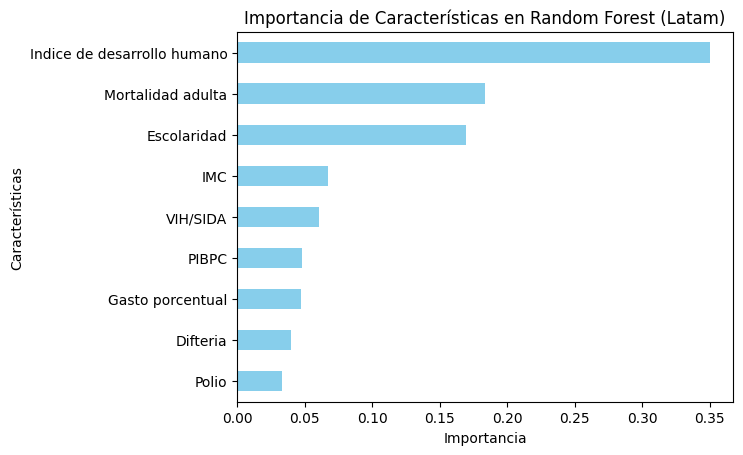

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Obtener las importancias de las características del modelo ajustado para Latam
importances_latam = mejor_rf_latam.feature_importances_
features_latam = X_latam.columns

# Crear un DataFrame con las importancias de características
feature_importances_latam = pd.DataFrame(importances_latam, index=features_latam, columns=["Importancia"]).sort_values(by="Importancia", ascending=False)

# Visualizar el gráfico de las características más importantes
plt.figure(figsize=(10, 6))
feature_importances_latam.plot(kind="barh", legend=False, color='skyblue')
plt.title("Importancia de Características en Random Forest (Latam)")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.gca().invert_yaxis()  
plt.show()

_En relacion a los datos globales, podemos ver que las relaciones tanto positivas como negativas, son similares, los datos mas escuetos nos permite un modelo mas especifico pero menos variable, las variables con impacto positivo se mantienen **Escolaridad** y **IDH**, asi como tambien las variables con impacto negativo; **Mortalidad Adulta** y **VIH/SIDA**._